In [156]:
import pandas as pd
import numpy as np
import eda
import importlib

import warnings
# supress warnings in QQ plots
warnings.filterwarnings( "ignore", module = "statsmodels/graphics/gofplots.py:993*" )

importlib.reload(eda)

pd.set_option('display.max_columns', 500)

# Stop and Search

Where is the data from, what period does it cover, what does it tell us, what is in it?

In [157]:
df_stopsearch_init = pd.read_csv("data/stop_search.csv")

In [158]:
df_stopsearch_init

,Command Code,Command Desc,Division Code,Division Desc,Area Command Code,Area Command Desc,Council Code,Council Desc,Multi Member Ward,Search Date,Year,Month,Day of the Week,Time of the Day,Search Result,Search Statute,Search Reason Code,Search Reason,Search Type,Incident Type,Desc Drugs Found,Desc Off Weap Found,Desc Alcohol Found,Desc Other Items Found,Desc Tobacco Found,Desc Substance Found,Nominal Age,Nominal Gender,Nominal Ethnicity,Ethnic Group,Receipt Issued,Seizure Alcohol Legislation,Seizure Tobacco Legislation,Nominal Unknown,Nominal Under 18,Nominal Age Unknown,Nominal Physical Search Type
0,1.0,North,1.0,North East,1.0,Aberdeen North - AK,1.0,Aberdeen City,Northfield/Mastrick North,31/12/2020 14:00,2020,December,Thursday,14:00:00,Positive,Sec 23(2) of the Misuse of Drugs Act 1971 (Drugs),1.0,Drugs,NaN,Stop and Search,Class B,NaN,NaN,NaN,NaN,NaN,38.0,Male,"Pakistani, Pakistani Scottish, Pakistani British",8,1.0,NaN,NaN,N,NaN,NaN,STANDARD
1,1.0,North,1.0,North East,1.0,Aberdeen North - AK,1.0,Aberdeen City,Hilton/Woodside/Stockethill,31/12/2020 08:20,2020,December,Thursday,08:20:00,Positive,Sec 23(3) Misuse Of Drugs Act 1971,21.0,Warrant,NaN,Stop and Search,Class B,NaN,NaN,NaN,NaN,NaN,38.0,Male,White English,2,1.0,NaN,NaN,N,NaN,NaN,STANDARD
2,1.0,North,1.0,North East,1.0,Aberdeen North - AK,1.0,Aberdeen City,Hilton/Woodside/Stockethill,31/12/2020 08:20,2020,December,Thursday,08:20:00,Positive,Sec 23(3) Misuse Of Drugs Act 1971,21.0,Warrant,NaN,Stop and Search,Class B,NaN,NaN,NaN,NaN,NaN,39.0,Male,White English,2,1.0,NaN,NaN,N,NaN,NaN,STANDARD
3,1.0,North,1.0,North East,1.0,Aberdeen North - AK,1.0,Aberdeen City,George St/Harbour,31/12/2020 03:30,2020,December,Thursday,03:30:00,Negative,Sec 23(2) of the Misuse of Drugs Act 1971 (Drugs),1.0,Drugs,NaN,Stop and Search,NaN,NaN,NaN,NaN,NaN,NaN,28.0,Male,White Scottish,1,1.0,NaN,NaN,N,NaN,NaN,STANDARD
4,1.0,North,1.0,North East,1.0,Aberdeen North - AK,1.0,Aberdeen City,Kingswells/Sheddocksley/Summerhill,31/12/2020 02:40,2020,December,Thursday,02:40:00,Negative,Sec 23(2) of the Misuse of Drugs Act 1971 (Drugs),1.0,Drugs,NaN,Stop and Search,NaN,NaN,NaN,NaN,NaN,NaN,30.0,Female,White Other,6,1.0,NaN,NaN,N,NaN,NaN,STANDARD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Annandale East and Eskdale,23/11/2019 18:00,2019,November,Saturday,18:00:00,Negative,Sec 23(2) of the Misuse of Drugs Act 1971 (Drugs),1.0,Drugs,NaN,Stop and Search,NaN,NaN,NaN,NaN,NaN,NaN,46.0,Male,White Scottish,1,1.0,NaN,NaN,N,NaN,NaN,STANDARD
75192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Annandale East and Eskdale,23/11/2019 18:00,2019,November,Saturday,18:00:00,Negative,Sec 23(2) of the Misuse of Drugs Act 1971 (Drugs),1.0,Drugs,NaN,Stop and Search,NaN,NaN,NaN,NaN,NaN,NaN,44.0,Male,White Scottish,1,1.0,NaN,NaN,N,NaN,NaN,STANDARD
75193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Annandale East and Eskdale,23/11/2019 18:00,2019,November,Saturday,18:00:00,Positive,Sec 23(2) of the Misuse of Drugs Act 1971 (Drugs),1.0,Drugs,NaN,Stop and Search,Class B,NaN,NaN,NaN,NaN,NaN,43.0,Male,White Scottish,1,1.0,NaN,NaN,N,NaN,NaN,STANDARD
75194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Berwickshire,02/07/2019 20:00,2019,July,Tuesday,20:00:00,Positive,Sec 23(2) of the Misuse of Drugs Act 1971 (Drugs),1.0,Drugs,NaN,Stop and Search,Class B,NaN,NaN,NaN,NaN,NaN,29.0,Male,White Scottish,1,1.0,NaN,NaN,N,NaN,NaN,STANDARD


In [159]:
df_stopsearch_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75196 entries, 0 to 75195
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Command Code                  75182 non-null  float64
 1   Command Desc                  75182 non-null  object 
 2   Division Code                 75182 non-null  float64
 3   Division Desc                 75182 non-null  object 
 4   Area Command Code             75182 non-null  float64
 5   Area Command Desc             75182 non-null  object 
 6   Council Code                  75182 non-null  float64
 7   Council Desc                  75182 non-null  object 
 8   Multi Member Ward             75192 non-null  object 
 9   Search Date                   75196 non-null  object 
 10  Year                          75196 non-null  int64  
 11  Month                         75196 non-null  object 
 12  Day of the Week               75196 non-null  object 
 13  T

In [160]:
# bin time of day into hours
# in desc <type> found, replace nan with "None", or something to disinquish from missing data
# check link bwteen age unkown, under 18 and age columns
# what is nominial unknown?
# check for missing data


We can remove some columns straight away. A number have a description and, handily, a code, so we will get rid of the description and use the codes for classification:
- Command Desc
- Division Desc
- Area Command Desc
- Council Desc
- Search Resason
- Nominal Ethnicity

Additionaly, Search Type holds no data so can be removed.

"Desc Substance Found" akso has no data but in a different data set it might, so we will leave it in place.

Search Date can be removed as we seperately have time, year, month and day of week. The only information lost is day of the month which likely doesn't have predictive power.



In [161]:
df_stopsearch = df_stopsearch_init.drop(["Command Desc", "Division Desc", "Area Command Desc", "Council Desc", "Search Reason", "Nominal Ethnicity", "Search Date", "Search Type"], axis=1).copy()

In [162]:
df_stopsearch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75196 entries, 0 to 75195
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Command Code                  75182 non-null  float64
 1   Division Code                 75182 non-null  float64
 2   Area Command Code             75182 non-null  float64
 3   Council Code                  75182 non-null  float64
 4   Multi Member Ward             75192 non-null  object 
 5   Year                          75196 non-null  int64  
 6   Month                         75196 non-null  object 
 7   Day of the Week               75196 non-null  object 
 8   Time of the Day               75196 non-null  object 
 9   Search Result                 74711 non-null  object 
 10  Search Statute                74711 non-null  object 
 11  Search Reason Code            74711 non-null  float64
 12  Incident Type                 75196 non-null  object 
 13  D

## Missing Data

Command/Division/Area/Council Missing for 14 examples. We know which ward 9 of thgem are in so it might be possible to repair this data.

The known wards for the missing data:

Annandale East and Eskdale: 3,West,14,Dumfries and Galloway,71,Dumfriesshire - VA,32,Dumfries & Galloway

East Berwickshire: 2,East,7,The Lothians and Scottish Borders,31,Scottish Borders - JB,18,Scottish Borders

In [163]:
indexes_to_update = df_stopsearch[ (df_stopsearch["Multi Member Ward"] == "Annandale East and Eskdale") & (df_stopsearch["Command Code"].isnull())].index
df_stopsearch.iloc[indexes_to_update,0] = 3
df_stopsearch.iloc[indexes_to_update,1] = 13
df_stopsearch.iloc[indexes_to_update,2] = 71
df_stopsearch.iloc[indexes_to_update,3] = 32

df_stopsearch.iloc[indexes_to_update]

,Command Code,Division Code,Area Command Code,Council Code,Multi Member Ward,Year,Month,Day of the Week,Time of the Day,Search Result,Search Statute,Search Reason Code,Incident Type,Desc Drugs Found,Desc Off Weap Found,Desc Alcohol Found,Desc Other Items Found,Desc Tobacco Found,Desc Substance Found,Nominal Age,Nominal Gender,Ethnic Group,Receipt Issued,Seizure Alcohol Legislation,Seizure Tobacco Legislation,Nominal Unknown,Nominal Under 18,Nominal Age Unknown,Nominal Physical Search Type
75186,3.0,13.0,71.0,32.0,Annandale East and Eskdale,2020,September,Thursday,16:00:00,Positive,Sec 23(2) of the Misuse of Drugs Act 1971 (Drugs),1.0,Stop and Search,Class B,NaN,NaN,NaN,NaN,NaN,28.0,Male,1,1.0,NaN,NaN,N,NaN,NaN,STANDARD
75188,3.0,13.0,71.0,32.0,Annandale East and Eskdale,2020,June,Friday,16:10:00,Negative,Sec 23(2) of the Misuse of Drugs Act 1971 (Drugs),1.0,Stop and Search,NaN,NaN,NaN,NaN,NaN,NaN,41.0,Male,2,1.0,NaN,NaN,N,NaN,NaN,STANDARD
75189,3.0,13.0,71.0,32.0,Annandale East and Eskdale,2020,January,Thursday,20:15:00,Negative,Sec 66 Criminal Justice (Scotland) Act 2016 (R...,20.0,Stop and Search,NaN,NaN,NaN,NaN,NaN,NaN,23.0,Male,2,1.0,NaN,NaN,N,NaN,NaN,STANDARD
75190,3.0,13.0,71.0,32.0,Annandale East and Eskdale,2019,November,Saturday,18:00:00,Negative,Sec 23(2) of the Misuse of Drugs Act 1971 (Drugs),1.0,Stop and Search,NaN,NaN,NaN,NaN,NaN,NaN,18.0,Male,1,1.0,NaN,NaN,N,NaN,NaN,STANDARD
75191,3.0,13.0,71.0,32.0,Annandale East and Eskdale,2019,November,Saturday,18:00:00,Negative,Sec 23(2) of the Misuse of Drugs Act 1971 (Drugs),1.0,Stop and Search,NaN,NaN,NaN,NaN,NaN,NaN,46.0,Male,1,1.0,NaN,NaN,N,NaN,NaN,STANDARD
75192,3.0,13.0,71.0,32.0,Annandale East and Eskdale,2019,November,Saturday,18:00:00,Negative,Sec 23(2) of the Misuse of Drugs Act 1971 (Drugs),1.0,Stop and Search,NaN,NaN,NaN,NaN,NaN,NaN,44.0,Male,1,1.0,NaN,NaN,N,NaN,NaN,STANDARD
75193,3.0,13.0,71.0,32.0,Annandale East and Eskdale,2019,November,Saturday,18:00:00,Positive,Sec 23(2) of the Misuse of Drugs Act 1971 (Drugs),1.0,Stop and Search,Class B,NaN,NaN,NaN,NaN,NaN,43.0,Male,1,1.0,NaN,NaN,N,NaN,NaN,STANDARD
75195,3.0,13.0,71.0,32.0,Annandale East and Eskdale,2019,May,Monday,23:33:00,Negative,Sec 23(2) of the Misuse of Drugs Act 1971 (Drugs),1.0,Stop and Search,NaN,NaN,NaN,NaN,NaN,NaN,49.0,Male,1,1.0,NaN,NaN,N,NaN,NaN,STANDARD


In [164]:
indexes_to_update = df_stopsearch[ (df_stopsearch["Multi Member Ward"] == "East Berwickshire") & (df_stopsearch["Command Code"].isnull())].index
df_stopsearch.iloc[indexes_to_update,0] = 2
df_stopsearch.iloc[indexes_to_update,1] = 7
df_stopsearch.iloc[indexes_to_update,2] = 31
df_stopsearch.iloc[indexes_to_update,3] = 18

df_stopsearch.iloc[indexes_to_update]

,Command Code,Division Code,Area Command Code,Council Code,Multi Member Ward,Year,Month,Day of the Week,Time of the Day,Search Result,Search Statute,Search Reason Code,Incident Type,Desc Drugs Found,Desc Off Weap Found,Desc Alcohol Found,Desc Other Items Found,Desc Tobacco Found,Desc Substance Found,Nominal Age,Nominal Gender,Ethnic Group,Receipt Issued,Seizure Alcohol Legislation,Seizure Tobacco Legislation,Nominal Unknown,Nominal Under 18,Nominal Age Unknown,Nominal Physical Search Type
75194,2.0,7.0,31.0,18.0,East Berwickshire,2019,July,Tuesday,20:00:00,Positive,Sec 23(2) of the Misuse of Drugs Act 1971 (Drugs),1.0,Stop and Search,Class B,NaN,NaN,NaN,NaN,NaN,29.0,Male,1,1.0,NaN,NaN,N,NaN,NaN,STANDARD


We have repaired what we can, we have no information to repair the remaining missing location data and will need to drop these rows.

In [165]:
df_stopsearch = df_stopsearch[df_stopsearch["Command Code"].notnull()]

In [166]:
df_stopsearch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75191 entries, 0 to 75195
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Command Code                  75191 non-null  float64
 1   Division Code                 75191 non-null  float64
 2   Area Command Code             75191 non-null  float64
 3   Council Code                  75191 non-null  float64
 4   Multi Member Ward             75191 non-null  object 
 5   Year                          75191 non-null  int64  
 6   Month                         75191 non-null  object 
 7   Day of the Week               75191 non-null  object 
 8   Time of the Day               75191 non-null  object 
 9   Search Result                 74706 non-null  object 
 10  Search Statute                74706 non-null  object 
 11  Search Reason Code            74706 non-null  float64
 12  Incident Type                 75191 non-null  object 
 13  D

Now, what missing date is left to deal with?

<AxesSubplot:>

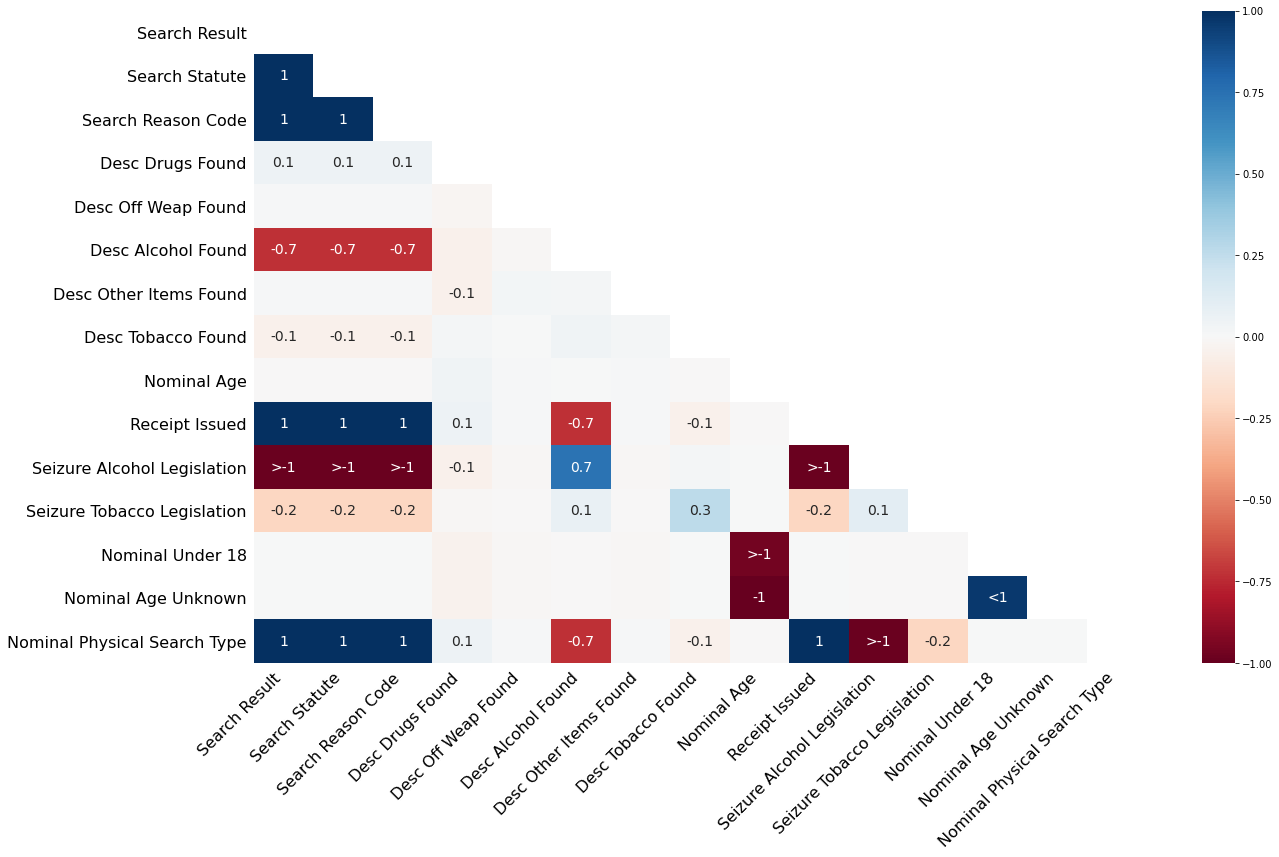

In [167]:
import missingno as msno

msno.heatmap(df_stopsearch)